# Some import Important Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

Dataset The dataset includes data from 768 women with 8 characteristics, in particular:

Number of times pregnant Plasma glucose concentration a 2 hours in an oral glucose tolerance test. Diastolic blood pressure (mm Hg). Triceps skin fold thickness (mm). 2-Hour serum insulin (mu U/ml). Body mass index (weight in kg/(height in m)^2). Diabetes pedigree function. Age (years). The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0).


# read_csv file (Diabetes)

In [2]:
df=pd.read_csv('C:\\Users\\Imran\\Desktop\\diabetes_data.csv')
df.head(5) 

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# shape of the dataset
df.shape

(768, 9)

# Data Correlation

In [5]:
corr = df.corr()
corr

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


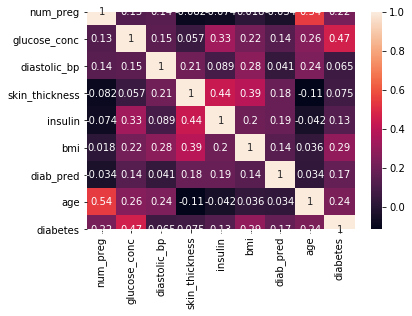

In [6]:
%matplotlib inline
import seaborn as sns#Seaborn is a Python data visualization library based on matplotlib. 
#It provides a high-level interface for drawing attractive and informative statistical graphics.
sns.heatmap(corr, annot = True)

# Analysis Data set

In [7]:
# Check for the Null column values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
num_preg          768 non-null int64
glucose_conc      768 non-null int64
diastolic_bp      768 non-null int64
skin_thickness    768 non-null int64
insulin           768 non-null int64
bmi               768 non-null float64
diab_pred         768 non-null float64
age               768 non-null int64
diabetes          768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.keys()

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')

In [9]:
df.dtypes

num_preg            int64
glucose_conc        int64
diastolic_bp        int64
skin_thickness      int64
insulin             int64
bmi               float64
diab_pred         float64
age                 int64
diabetes            int64
dtype: object

In [10]:
df.groupby('diabetes').size()

diabetes
0    500
1    268
dtype: int64

# Visulization The Data set

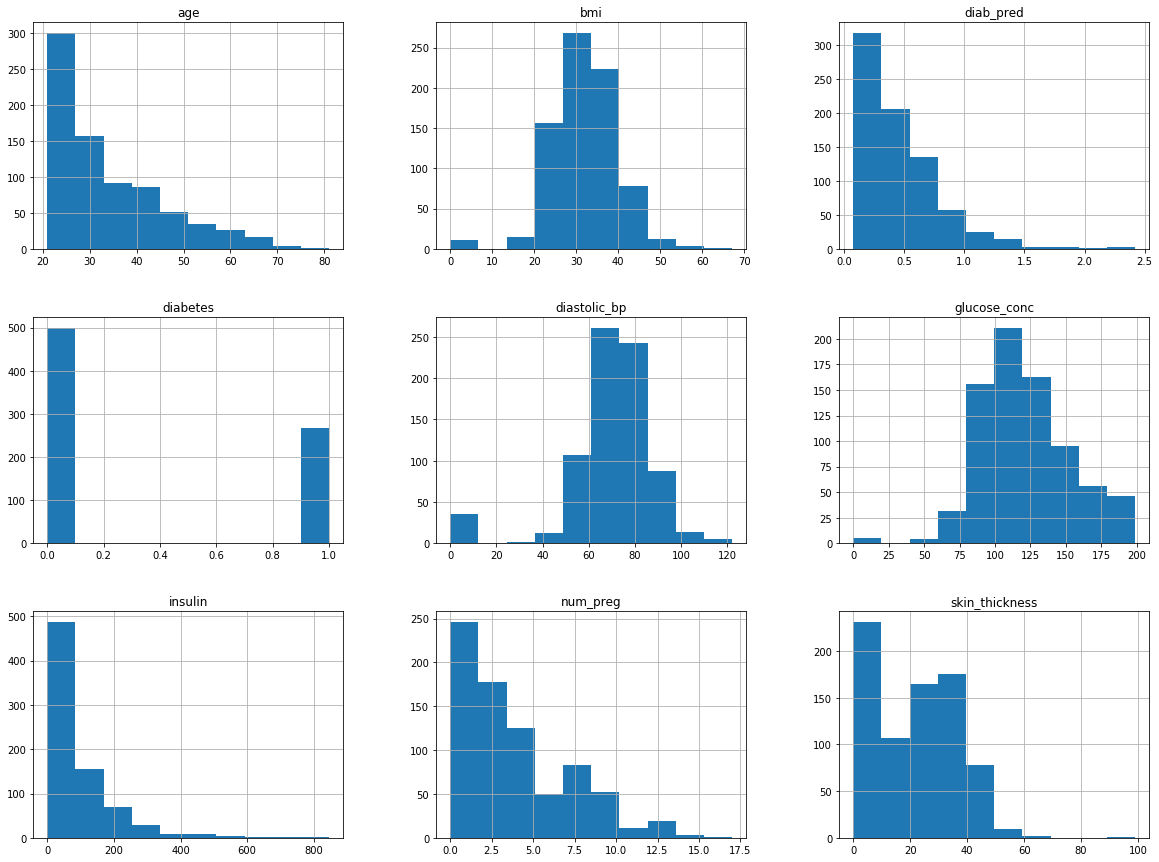

In [11]:
import matplotlib.pyplot as plt
df.hist(bins=10, figsize=(20, 15))
plt.show()

diabetes
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

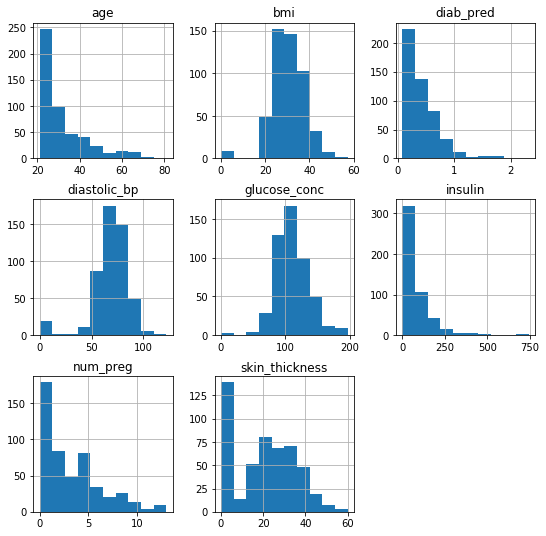

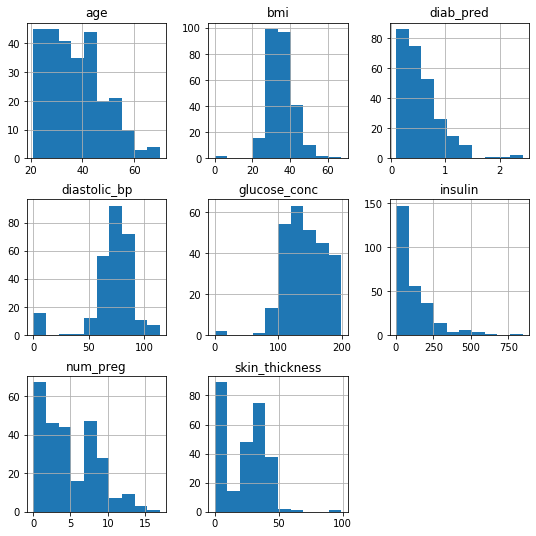

In [12]:
df.groupby('diabetes').hist(figsize=(9, 9))

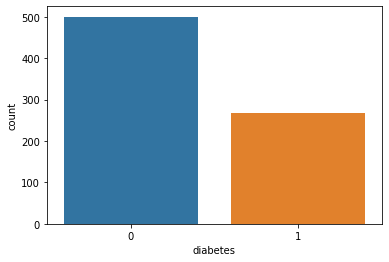

In [13]:
# check for the positive and negative labels.
sns.countplot(x="diabetes",data=df)

In [14]:
# how to check null values. 
df.isnull().sum().sum()

0

# Divide the Data set

In [15]:
real_x = df.iloc[:,:-1]
real_y = df.iloc[:,-1]

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaler.fit(real_x)
data_scaled = scaler.transform(real_x)

In [18]:
real_X = pd.DataFrame(data=data_scaled)

In [19]:
real_X

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [20]:
real_X.columns=['num_preg', 
                'glucose_conc', 
                'diastolic_bp', 
                'skin_thickness', 
                'insulin', 'bmi',
                'diab_pred', 
                'age']

In [21]:
real_X

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [22]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Feature Selection

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
best_feature = SelectKBest(score_func=chi2, k=5)
fit = best_feature.fit(real_x,real_y)

In [25]:
dfScore = pd.DataFrame(fit.scores_)
dfColumns = pd.DataFrame(real_x.columns)
#Concatenate 
feature_score = pd.concat([dfScore,dfColumns],axis=1)
feature_score.columns = ["diabetes",'Score']
print(feature_score.nlargest(5,'diabetes'))

      diabetes         Score
4  2175.565273       insulin
1  1411.887041  glucose_conc
7   181.303689           age
5   127.669343           bmi
0   111.519691      num_preg


# Feature Importance

[0.11078696 0.23448059 0.09584609 0.08104222 0.07872309 0.13489839
 0.11622544 0.14799723]


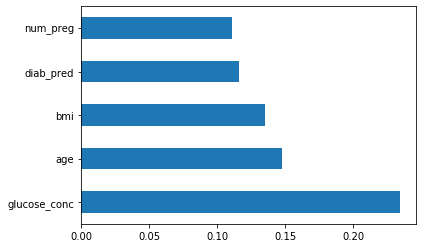

In [26]:
#Feature Importance 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(real_x,real_y)
print(model.feature_importances_)
feature_importances = pd.Series(model.feature_importances_,index=real_x.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.show()

# Correlation Matrix with Visulization

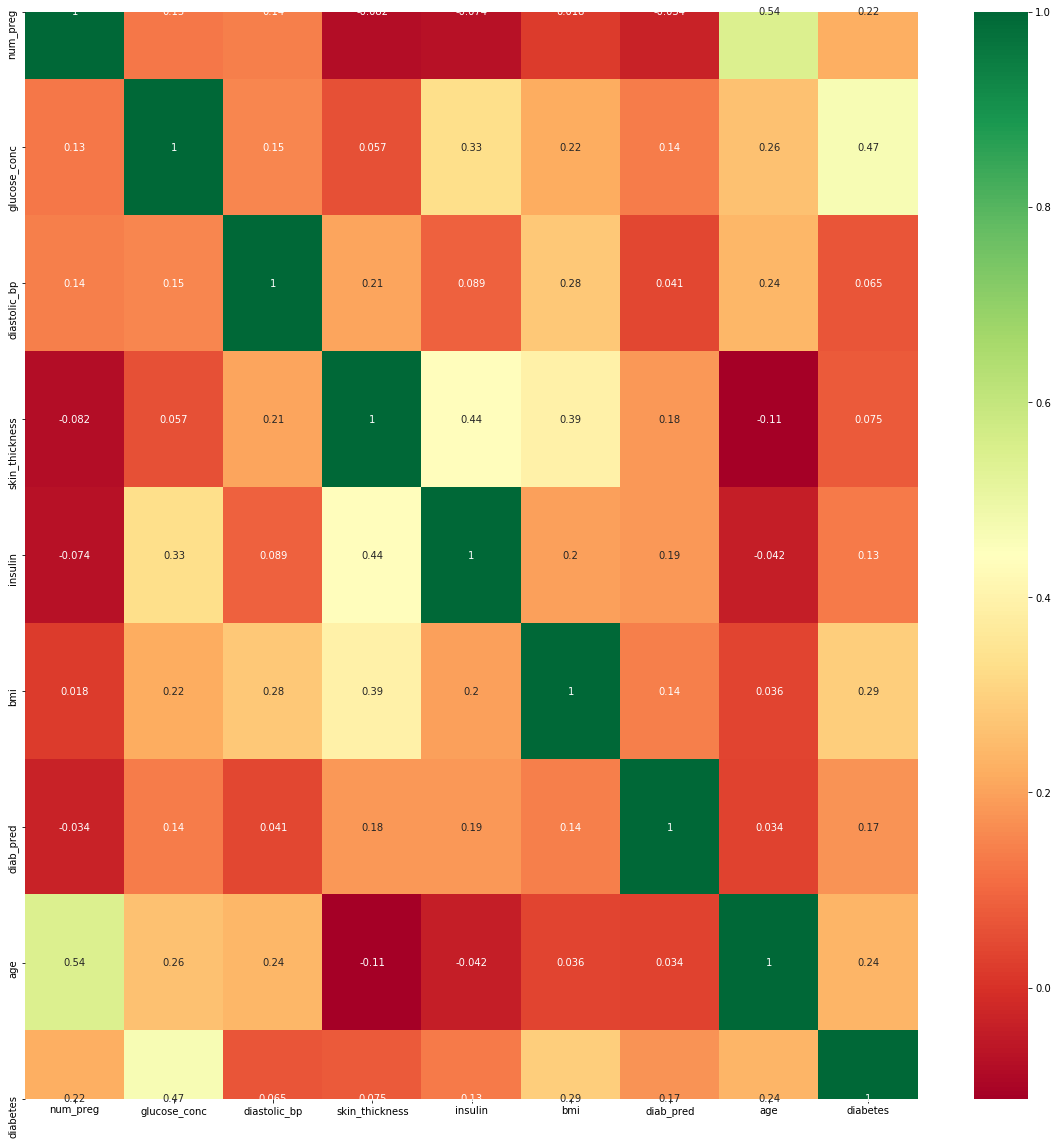

In [27]:
#Correlation Matrix
corr = df.corr()
top_corr_features = corr.index
plt.figure(figsize=(20,20))
#plot heatmap
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Resampling Random Over Sampling

In [28]:
from imblearn.over_sampling import RandomOverSampler

In [29]:
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(real_x,real_y)

In [30]:
df = pd.DataFrame(y_over)

In [31]:
df["diabetes"].value_counts()

1    500
0    500
Name: diabetes, dtype: int64

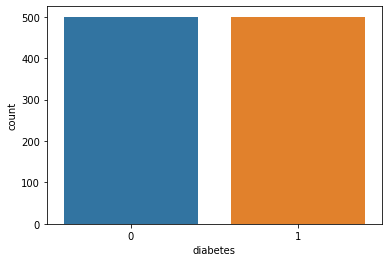

In [32]:
sns.countplot(x="diabetes",data=df)

# Random Under Sampling

In [33]:
from imblearn.under_sampling import RandomUnderSampler

In [34]:
rus = RandomUnderSampler()
X_under, y_under = rus.fit_resample(real_x,real_y)

In [35]:
df = pd.DataFrame(y_under)

In [36]:
df["diabetes"].value_counts()

1    268
0    268
Name: diabetes, dtype: int64

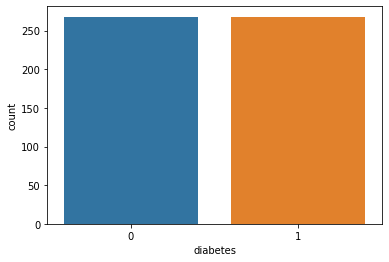

In [37]:
sns.countplot(x="diabetes", data=df)

# Spliting the Data set

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
training_x,test_x,training_y,test_y = train_test_split(X_over,y_over,test_size=0.3,random_state=0)

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
LR = LogisticRegression()
LR.fit(training_x,training_y)

C:\Users\Imran\Anaconda3\anacond\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [42]:
y_pred = LR.predict(test_x)

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("#########################################################################")
print(classification_report(test_y,y_pred))

[[121  35]
 [ 32 112]]
#########################################################################
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       156
           1       0.76      0.78      0.77       144

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



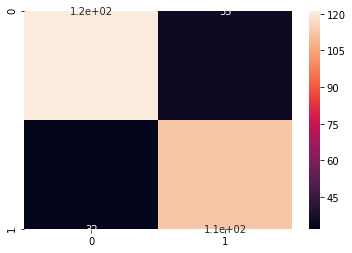

In [44]:
cm =confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(test_y,y_pred)

0.7766666666666666

# Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
RFC = RandomForestClassifier()
RFC.fit(training_x,training_y)

RandomForestClassifier()

In [49]:
y_pred = RFC.predict(test_x)

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("########################################################3")
print(classification_report(test_y,y_pred))

[[128  28]
 [  9 135]]
########################################################3
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       156
           1       0.83      0.94      0.88       144

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



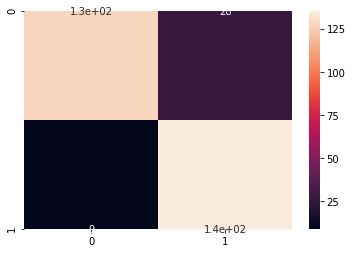

In [51]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm, annot=True)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(test_y,y_pred)

0.8766666666666667

# KNeighborsClassifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier()
knn.fit(training_x,training_y)

KNeighborsClassifier()

In [56]:
y_pred = knn.predict(test_x)

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("############################################################")
print(classification_report(test_y,y_pred))

[[ 98  58]
 [ 25 119]]
############################################################
              precision    recall  f1-score   support

           0       0.80      0.63      0.70       156
           1       0.67      0.83      0.74       144

    accuracy                           0.72       300
   macro avg       0.73      0.73      0.72       300
weighted avg       0.74      0.72      0.72       300



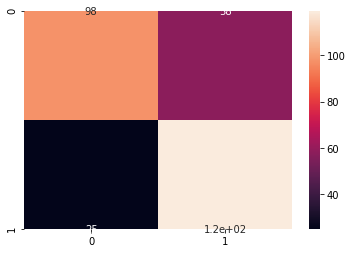

In [58]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(test_y,y_pred)

0.7233333333333334

# Decision tree Classifier

In [61]:
from sklearn.tree  import DecisionTreeClassifier

In [62]:
DT = DecisionTreeClassifier()
DT.fit(training_x,training_y)

DecisionTreeClassifier()

In [63]:
y_pred = DT.predict(test_x)

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("##################################################################")
print(classification_report(test_y,y_pred))

[[114  42]
 [ 13 131]]
##################################################################
              precision    recall  f1-score   support

           0       0.90      0.73      0.81       156
           1       0.76      0.91      0.83       144

    accuracy                           0.82       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300



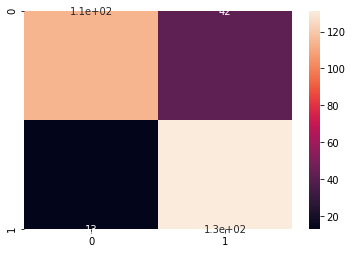

In [65]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(test_y,y_pred)

0.8166666666666667

# Support Vector Classifier

In [68]:
from sklearn.svm import SVC

In [69]:
svc = SVC(C=1.0)
svc.fit(training_x,training_y)

SVC()

In [70]:
y_pred = svc.predict(test_x)

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print('###########################################################')
print(classification_report(test_y,y_pred))

[[118  38]
 [ 38 106]]
###########################################################
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       156
           1       0.74      0.74      0.74       144

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



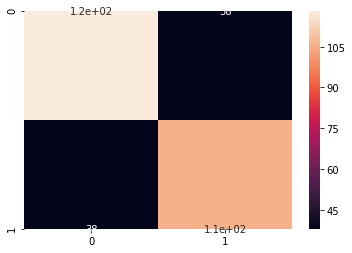

In [72]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(test_y,y_pred)

0.7466666666666667

# SGD Classifier

In [75]:
from sklearn.linear_model import SGDClassifier

In [76]:
sgd = SGDClassifier()
sgd.fit(training_x,training_y)

SGDClassifier()

In [77]:
y_pred = sgd.predict(test_x)

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print('######################################################################')
print(classification_report(test_y,y_pred))

[[ 57  99]
 [  8 136]]
######################################################################
              precision    recall  f1-score   support

           0       0.88      0.37      0.52       156
           1       0.58      0.94      0.72       144

    accuracy                           0.64       300
   macro avg       0.73      0.65      0.62       300
weighted avg       0.73      0.64      0.61       300



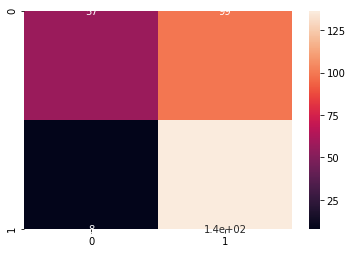

In [79]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(test_y,y_pred)

0.6433333333333333

# GaussianNB

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
gnb = GaussianNB()
gnb.fit(training_x,training_y)

GaussianNB()

In [84]:
y_pred = gnb.predict(test_x)

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_y,y_pred))
print("######################################################################")
print(classification_report(test_y,y_pred))

[[127  29]
 [ 39 105]]
######################################################################
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       156
           1       0.78      0.73      0.76       144

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



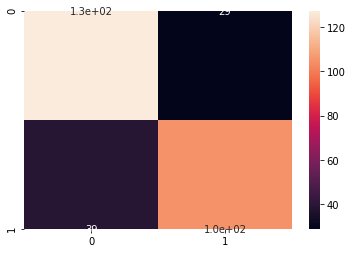

In [86]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(test_y,y_pred)

0.7733333333333333

# MultinomialNB

In [89]:
from sklearn.naive_bayes import MultinomialNB

In [90]:
mnb = MultinomialNB()
mnb.fit(training_x,training_y)

MultinomialNB()

In [91]:
y_pred = mnb.predict(test_x)

In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("#######################################################################")
#print(classification_report(test_x,test_y))

[[110  46]
 [ 80  64]]
#######################################################################


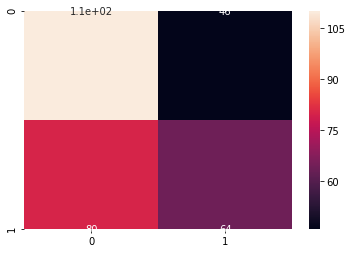

In [93]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(test_y,y_pred)

0.58

# BernoulliNB

In [96]:
from sklearn.naive_bayes import BernoulliNB

In [97]:
bnb = BernoulliNB()
bnb.fit(training_x,training_y)

BernoulliNB()

In [98]:
y_pred = bnb.predict(test_x)

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("##############################################################")
print(classification_report(test_y,y_pred))

[[76 80]
 [66 78]]
##############################################################
              precision    recall  f1-score   support

           0       0.54      0.49      0.51       156
           1       0.49      0.54      0.52       144

    accuracy                           0.51       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.52      0.51      0.51       300



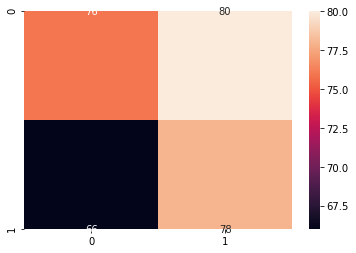

In [100]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [101]:
from sklearn.metrics import accuracy_score

In [102]:
accuracy_score(test_y,y_pred)

0.5133333333333333

# AdaBoost Classifier

In [103]:
from sklearn.ensemble import AdaBoostClassifier

In [104]:
ada = AdaBoostClassifier()
ada.fit(training_x,training_y)

AdaBoostClassifier()

In [105]:
y_pred = ada.predict(test_x)

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("#####################################################################")
print(classification_report(test_y,y_pred))

[[122  34]
 [ 20 124]]
#####################################################################
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       156
           1       0.78      0.86      0.82       144

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



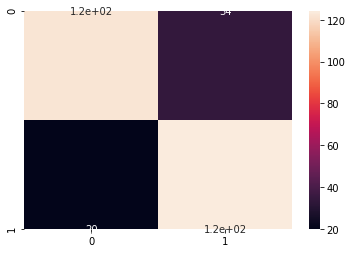

In [107]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
accuracy_score(test_y,y_pred)

0.82

# XGboost Classifier

In [110]:
from xgboost import XGBClassifier

In [111]:
xgb = XGBClassifier()
xgb.fit(training_x,training_y)

XGBClassifier()

In [112]:
y_pred = xgb.predict(test_x)

In [113]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("##############################################################")
#print(classification_report(test_x,test_y))

[[122  34]
 [  9 135]]
##############################################################


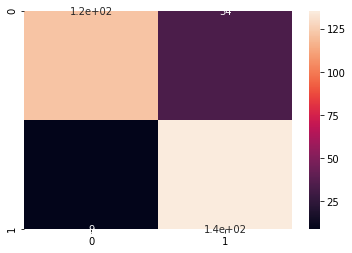

In [114]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
accuracy_score(test_y,y_pred)

0.8566666666666667

# GradientBoosting Classifier

In [117]:
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
gbc = GradientBoostingClassifier()
gbc.fit(training_x,training_y)

GradientBoostingClassifier()

In [119]:
y_pred = gbc.predict(test_x)

In [120]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("########################################################")
print(classification_report(test_y,y_pred))

[[123  33]
 [  9 135]]
########################################################
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       156
           1       0.80      0.94      0.87       144

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300



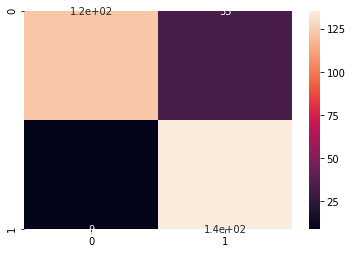

In [121]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [122]:
from sklearn.metrics import accuracy_score

In [123]:
accuracy_score(test_y,y_pred)

0.86

In [124]:
classifiers={'LogisticRegression':LR,'BernoulliNB':bnb,'GaussianNB':gnb,'RandomForestClassifier':RFC,'SVC': svc,'DecisionTreeClassifier': DT,'KNeighborsClassifier':knn
        , 'MultinomialNB':mnb,'XGBClassifier':xgb,'SGDClassifier':sgd,'GradientBoostingClassifier':gbc,'AdaBoostClassifier':ada }

In [125]:
classifier=sorted(classifiers.keys())
print(classifier)
df=pd.DataFrame(classifier,columns=['Classifiers'])
df

['AdaBoostClassifier', 'BernoulliNB', 'DecisionTreeClassifier', 'GaussianNB', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'MultinomialNB', 'RandomForestClassifier', 'SGDClassifier', 'SVC', 'XGBClassifier']


,Classifiers
0,AdaBoostClassifier
1,BernoulliNB
2,DecisionTreeClassifier
3,GaussianNB
4,GradientBoostingClassifier
5,KNeighborsClassifier
6,LogisticRegression
7,MultinomialNB
8,RandomForestClassifier
9,SGDClassifier



# Train the models and record the results 

In [127]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
parameter=[]
res=[]                                 
res=pd.DataFrame(res)
for n,c in sorted(classifiers.items()):                   
    kfold=StratifiedKFold(n_splits=10,random_state=None)  
    results=cross_val_score(c,X_over,y_over,cv=kfold)      
    parameter.append((n,[results.mean()]))                
    result=pd.DataFrame(results)                          
    res=pd.concat([res,result],axis=1,ignore_index=True) 

res.columns=['AdaBoostClassifier', 'BernoulliNB', 'DecisionTreeClassifier', 'GaussianNB', 'GradientBoostingClassifier',
             'KNeighborsClassifier', 'LogisticRegression', 'MultinomialNB', 'RandomForestClassifier', 'SGDClassifier',
             'SVC', 'XGBClassifier']    
res 

,AdaBoostClassifier,BernoulliNB,DecisionTreeClassifier,GaussianNB,GradientBoostingClassifier,KNeighborsClassifier,LogisticRegression,MultinomialNB,RandomForestClassifier,SGDClassifier,SVC,XGBClassifier
0,0.72,0.42,0.78,0.70,0.78,0.64,0.70,0.57,0.79,0.57,0.67,0.77
1,0.82,0.52,0.76,0.78,0.82,0.68,0.77,0.58,0.83,0.62,0.75,0.84
2,0.74,0.54,0.81,0.72,0.78,0.68,0.70,0.61,0.79,0.58,0.68,0.77
3,0.70,0.51,0.79,0.68,0.76,0.64,0.70,0.53,0.77,0.59,0.69,0.73
4,0.83,0.52,0.82,0.75,0.86,0.80,0.81,0.56,0.87,0.52,0.78,0.86
5,0.80,0.60,0.85,0.70,0.81,0.72,0.71,0.49,0.88,0.66,0.70,0.81
6,0.87,0.52,0.93,0.75,0.92,0.76,0.82,0.51,0.94,0.51,0.77,0.90
7,0.81,0.49,0.88,0.70,0.87,0.76,0.76,0.56,0.94,0.59,0.74,0.87
8,0.78,0.49,0.89,0.75,0.80,0.78,0.71,0.54,0.90,0.67,0.72,0.83
9,0.76,0.47,0.89,0.79,0.83,0.72,0.81,0.57,0.94,0.64,0.77,0.78


# Plot the figure

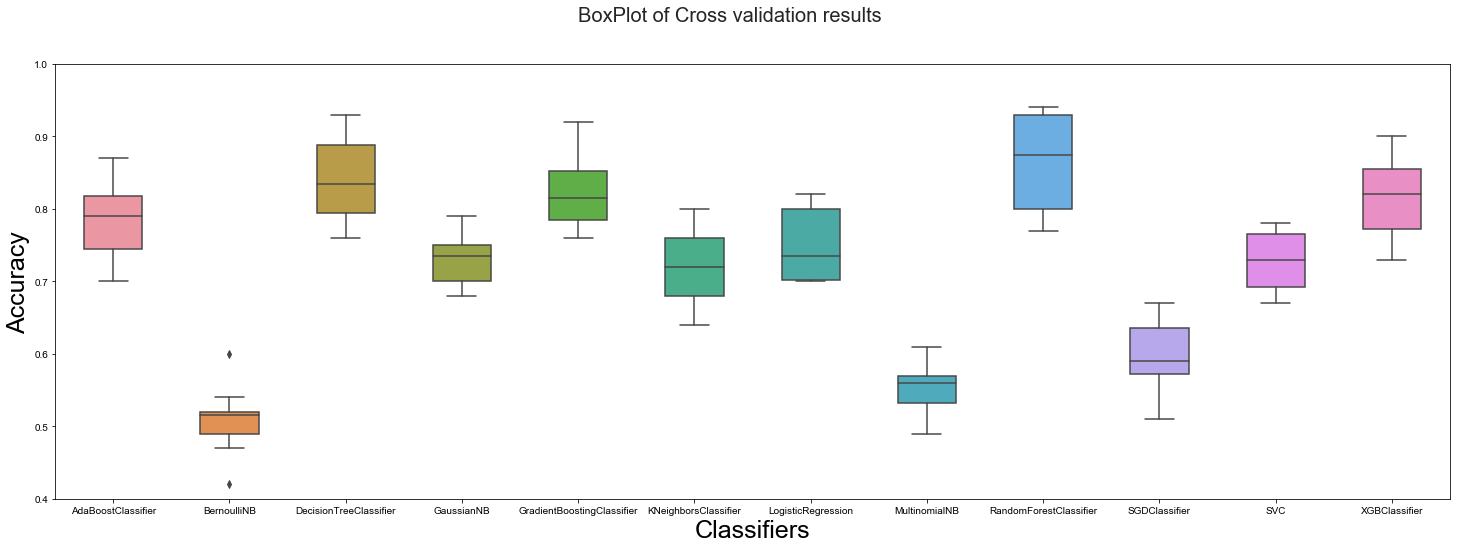

In [128]:
fig, ax = plt.subplots(figsize=(25,8))
sns.set(style="whitegrid")
boxplot=sns.boxplot(data=res,width=0.5)
boxplot.set_ylim([0.4,1.0])
fig.suptitle('BoxPlot of Cross validation results',fontsize=20)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel('Classifiers',fontsize=25)
plt.tick_params(axis='both', which='major', colors='black')
plt.show()

# Roc and Auc Curve Analysis

1) Classifier is : AdaBoostClassifier()

Total time in :  0.49998021125793457

Confusion_matrix is 
 [[122  34]
 [ 20 124]]

Precision :  0.82
Recall    :  0.82
f1_score  :  0.82
AUC: 0.822
2) Classifier is : BernoulliNB()

Total time in :  0.015624046325683594

Confusion_matrix is 
 [[76 80]
 [66 78]]

Precision :  0.5133333333333333
Recall    :  0.5133333333333333
f1_score  :  0.5133333333333333
AUC: 0.514
3) Classifier is : DecisionTreeClassifier()

Total time in :  0.03124094009399414

Confusion_matrix is 
 [[117  39]
 [ 19 125]]

Precision :  0.8066666666666666
Recall    :  0.8066666666666666
f1_score  :  0.8066666666666665
AUC: 0.809
4) Classifier is : GaussianNB()

Total time in :  0.03125452995300293

Confusion_matrix is 
 [[127  29]
 [ 39 105]]

Precision :  0.7733333333333333
Recall    :  0.7733333333333333
f1_score  :  0.7733333333333333
AUC: 0.772
5) Classifier is : GradientBoostingClassifier()

Total time in :  0.7031097412109375

Confusion_matrix is 
 [[123  33]
 [  9 135

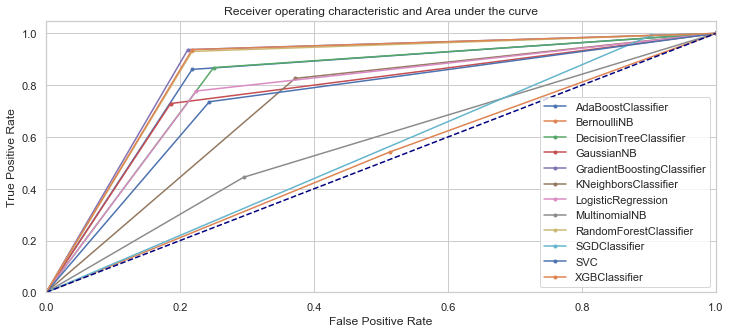

In [129]:
import time
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
score = []
i=1
plt.subplots(figsize=(12,5))
for n,c in sorted(classifiers.items()):
    start=time.time()
    c.fit(training_x,training_y)
    pred=c.predict(test_x)
    end=time.time()

    print("{}) Classifier is : {}\n".format(i,c))
    print("Total time in : ",end-start)

    score.append((n,[accuracy_score(test_y,pred,normalize=True),metrics.precision_score(test_y,pred,average='micro'),
                    metrics.recall_score(test_y, pred,average='micro'),metrics.f1_score(test_y,pred,average='micro')]))
    
    print("\nConfusion_matrix is \n",confusion_matrix(test_y,pred))
    precision=print("\nPrecision : ",metrics.precision_score(test_y,pred,average='micro'))      
    recall=print("Recall    : ",metrics.recall_score(test_y,pred,average='micro'))
    f1_score=print("f1_score  : ",metrics.f1_score(test_y,pred,average='micro'))
    
    # ROC AND AUC CURVE                                                             
    fpr,tpr,thresholds=roc_curve(test_y,pred)
    # calculate AUC
    auc=roc_auc_score(test_y,pred)
    print('AUC: %.3f' % auc)

    i=i+1
       
    plt.plot(fpr,tpr,marker='.',label=n)
    
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plot the roc curve for the model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve')
plt.legend()
plt.show()                

# Define all Model Score, Precision, Recall, f1_Score, Accuracy

In [131]:
score_df=pd.DataFrame.from_dict(dict(score),orient='index',columns=['scores','Precision','Recall','f1_score'])
score_df['Accuracy (%)']=score_df['scores']*100
score_df                  

,scores,Precision,Recall,f1_score,Accuracy (%)
AdaBoostClassifier,0.820000,0.820000,0.820000,0.820000,82.000000
BernoulliNB,0.513333,0.513333,0.513333,0.513333,51.333333
DecisionTreeClassifier,0.806667,0.806667,0.806667,0.806667,80.666667
GaussianNB,0.773333,0.773333,0.773333,0.773333,77.333333
GradientBoostingClassifier,0.860000,0.860000,0.860000,0.860000,86.000000
KNeighborsClassifier,0.723333,0.723333,0.723333,0.723333,72.333333
LogisticRegression,0.776667,0.776667,0.776667,0.776667,77.666667
MultinomialNB,0.580000,0.580000,0.580000,0.580000,58.000000
RandomForestClassifier,0.853333,0.853333,0.853333,0.853333,85.333333
SGDClassifier,0.526667,0.526667,0.526667,0.526667,52.666667
